In [1]:
#I have imported all the required libraries in this cell.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re


In [2]:
data=pd.read_csv("sentiment_analysis.csv") #i have downloaded the dataset from kaggle https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=train.csv

In [3]:
data.head(10) #top 10 rows of the dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
data.isnull().sum() #to check if their is any null value

id       0
label    0
tweet    0
dtype: int64

In [5]:
data['label'].value_counts() #to get the total number of zeroes and ones in the label column

0    29720
1     2242
Name: label, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

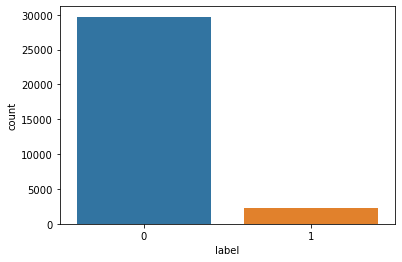

In [6]:
sns.countplot(data['label'])

In [7]:
x=data['tweet']#put independent feature in x
y=data['label']#put dependent feature in y

In [8]:
x.shape,y.shape

((31962,), (31962,))

In [9]:
ps=PorterStemmer()
wl=WordNetLemmatizer()

k=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z]',' ',str(x[i])) #replace any letter other than a-z or A-Z to spaces
    review=review.split() #tokenize the words
    review=[wl.lemmatize(word) for word in review if word not in stopwords.words('english')]#lemmatize the words and check whether it is not a stopwords
    review=" ".join(review)#join the words
    k.append(review)

In [10]:
k[0:5]

['user father dysfunctional selfish drag kid dysfunction run',
 'user user thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time ur',
 'factsguide society motivation']

In [11]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
voc=50000

In [12]:
oh=[one_hot(word,voc)for word in k] #one hot encoding of words
pad=pad_sequences(oh,padding='pre',maxlen=50) # add padding so each sentence will be of equal length
X=pad
y=np.array(y)
X.shape,y.shape

((31962, 50), (31962,))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
model=Sequential()

model.add(Embedding(voc,50,input_length=50)) #add an embedding layer
model.add(LSTM(50)) #add LSTM layer
model.add(Dropout(0.2)) #add droupout layer
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            2500000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,520,251
Trainable params: 2,520,251
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,epochs=5,batch_size=32) #train the model

Epoch 1/5
800/800 [==============================] - 28s 31ms/step - loss: 0.2330 - accuracy: 0.9360
Epoch 2/5
800/800 [==============================] - 25s 31ms/step - loss: 0.0688 - accuracy: 0.9770
Epoch 3/5
800/800 [==============================] - 25s 32ms/step - loss: 0.0342 - accuracy: 0.9899
Epoch 4/5
800/800 [==============================] - 25s 32ms/step - loss: 0.0195 - accuracy: 0.9944
Epoch 5/5
800/800 [==============================] - 27s 34ms/step - loss: 0.0115 - accuracy: 0.9973


In [15]:
model.predict(X_test)[0]

array([3.3358912e-05], dtype=float32)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy_score(y_pred,y_test) #check the accuracy of model

0.9533865165024246